# Football Data - Premier League Games 2013-2016
The dataset contains 1080 football games played in the Premier League between 2013 and 2016

In [3]:
%matplotlib inline
import json, pickle
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from urllib.request import Request, urlopen  # Python 3
from pandas import DataFrame

Downloading the dataset using the api:

In [8]:
apiKey = 'e6e6b7fee3a74338bef58c93244de2d9'
url = 'http://api.football-data.org/v1/soccerseasons/'
def getIDS():
    global apiKey, url
    ids = {}
    for year in ['2015', '2014', '2013']:
        q = Request(url + '?season=' + year)
        q.add_header('X-Auth-Token', apiKey)
        q.add_header('X-Response-Control', 'minified')
        res = json.loads(urlopen(q).read().decode())
        for league in res:
            if league['league'] == 'PL':
                ids[str(league['id'])] = year
    return ids

ids = getIDS()
for i in ids:
    q = Request(url + i + '/fixtures')
    q.add_header('X-Auth-Token', apiKey)
    q.add_header('X-Response-Control', 'minified')
    res = json.loads(urlopen(q).read().decode())
    pickle.dump(res['fixtures'], open(ids[i]+'-fixtures.pickle', 'wb'))

Raw data sample:

In [9]:
fixtures = []
for i in ids:
    fixtures += pickle.load(open(ids[i]+'-fixtures.pickle', 'rb'))
df = DataFrame(fixtures)
df.head()

,awayTeamId,awayTeamName,date,homeTeamId,homeTeamName,id,matchday,result,soccerseasonId,status
0,62,Everton FC,2013-08-16T22:00:00Z,68,Norwich City FC,134694,1,"{'goalsAwayTeam': 2, 'goalsHomeTeam': 2}",341,None
1,70,Stoke City FC,2013-08-16T22:00:00Z,64,Liverpool FC,134697,1,"{'goalsAwayTeam': 0, 'goalsHomeTeam': 1}",341,None
2,715,Cardiff City FC,2013-08-16T22:00:00Z,563,West Ham United FC,134771,1,"{'goalsAwayTeam': 0, 'goalsHomeTeam': 2}",341,None
3,340,Southampton FC,2013-08-16T22:00:00Z,74,West Bromwich Albion FC,134696,1,"{'goalsAwayTeam': 1, 'goalsHomeTeam': 0}",341,None
4,63,Fulham FC,2013-08-16T22:00:00Z,71,Sunderland AFC,134695,1,"{'goalsAwayTeam': 1, 'goalsHomeTeam': 0}",341,None


After cleaning the raw data (getting only what we need) the data looks like this:

In [10]:
fixtures = []
for i in ids:
    f = pickle.load(open(ids[i]+'-fixtures.pickle', 'rb'))
    for g in f:
        if g['status'] != 'TIMED':
            g.pop('status', None)
            g.pop('date', None)
            g.pop('id', None)
            g.pop('awayTeamId', None)
            g.pop('homeTeamId', None)
            g.pop('soccerseasonId', None)
            g['season'] = int(ids[i])
            g['goalsHomeTeam'] = g['result']['goalsHomeTeam']
            g['goalsAwayTeam'] = g['result']['goalsAwayTeam']
            g.pop('result', None)
            fixtures.append(g)
df = DataFrame(fixtures)
df.head()

,awayTeamName,goalsAwayTeam,goalsHomeTeam,homeTeamName,matchday,season
0,Everton FC,2,2,Norwich City FC,1,2013
1,Stoke City FC,0,1,Liverpool FC,1,2013
2,Cardiff City FC,0,2,West Ham United FC,1,2013
3,Southampton FC,1,0,West Bromwich Albion FC,1,2013
4,Fulham FC,1,0,Sunderland AFC,1,2013


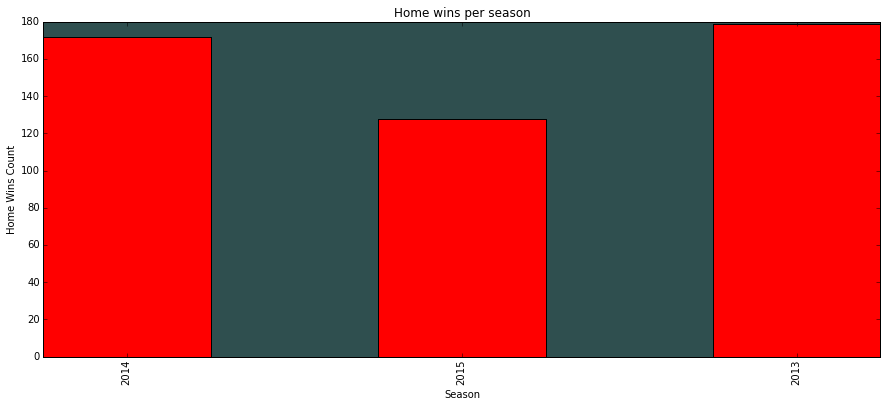

In [4]:
def plot1():
    global fixtures
    c = Counter()
    for g in fixtures:
        if g['goalsHomeTeam'] > g['goalsAwayTeam']:
            c[str(g['season'])] += 1

    x, y = zip(*c.items())
    fig = plt.figure(figsize=(15, 6))
    ax = plt.subplot(111, axisbg=(0.1843, 0.3098, 0.3098))
    width=0.5
    ax.bar(range(len(x)), y, width=width,color='red')
    ax.set_xticks(np.arange(len(x)) + width/2)
    ax.set_xticklabels(x, rotation=90)
    plt.title("Home wins per season")
    plt.xlabel("Season")
    plt.ylabel("Home Wins Count")
    plt.show()
plot1()

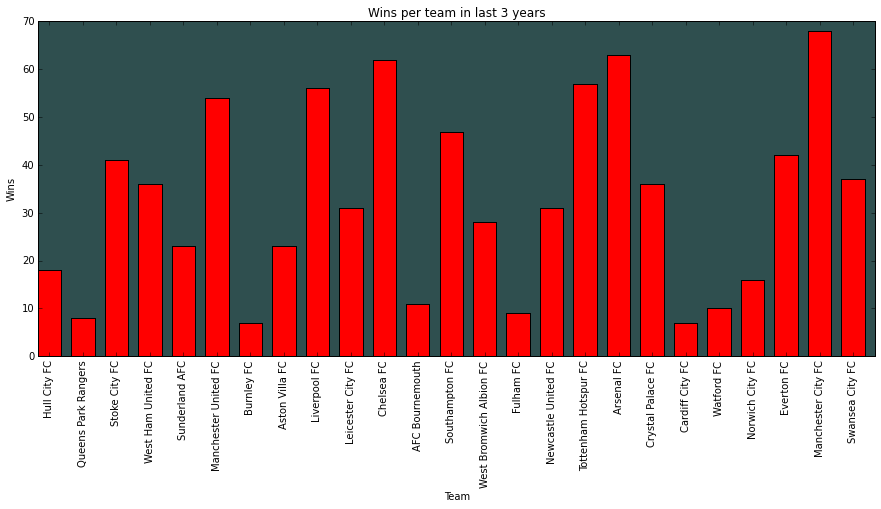

In [6]:
def plot2():
    global fixtures
    c = Counter()
    for g in fixtures:
        if g['goalsHomeTeam'] > g['goalsAwayTeam']:
            c[g['homeTeamName']] += 1
        elif g['goalsAwayTeam'] > g['goalsHomeTeam']:
            c[g['awayTeamName']] += 1

    x, y = zip(*c.items())
    fig = plt.figure(figsize=(15, 6))
    ax = plt.subplot(111, axisbg=(0.1843, 0.3098, 0.3098))
    width=0.7
    ax.bar(range(len(x)), y, width=width,color='red')
    ax.set_xticks(np.arange(len(x)) + width/2)
    ax.set_xticklabels(x, rotation=90)
    plt.title("Wins per team in last 3 years")
    plt.xlabel("Team")
    plt.ylabel("Wins")
    plt.show()
plot2()

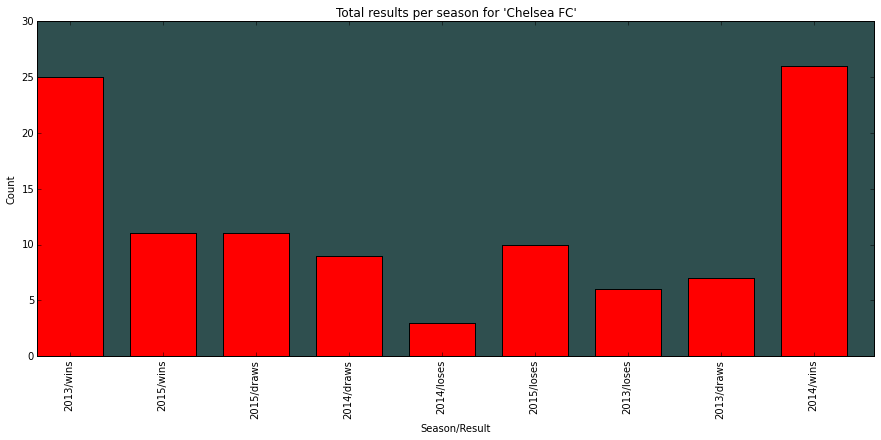

In [7]:
def plot3():
    global fixtures
    c = Counter()
    for g in fixtures:
        if g['homeTeamName'] == 'Chelsea FC':
            if g['goalsHomeTeam'] > g['goalsAwayTeam']:
                c[str(g['season']) + '/wins'] += 1
            elif g['goalsAwayTeam'] > g['goalsHomeTeam']:
                c[str(g['season']) + '/loses'] += 1
            else:
                c[str(g['season']) + '/draws'] += 1
        elif g['awayTeamName'] == 'Chelsea FC':
            if g['goalsHomeTeam'] > g['goalsAwayTeam']:
                c[str(g['season']) + '/loses'] += 1
            elif g['goalsAwayTeam'] > g['goalsHomeTeam']:
                c[str(g['season']) + '/wins'] += 1
            else:
                c[str(g['season']) + '/draws'] += 1

    x, y = zip(*c.items())
    fig = plt.figure(figsize=(15, 6))
    ax = plt.subplot(111, axisbg=(0.1843, 0.3098, 0.3098))
    width=0.7
    ax.bar(range(len(x)), y, width=width,color='red')
    ax.set_xticks(np.arange(len(x)) + width/2)
    ax.set_xticklabels(x, rotation=90)
    plt.title("Total results per season for 'Chelsea FC'")
    plt.xlabel("Season/Result")
    plt.ylabel("Count")
    plt.show()
plot3()

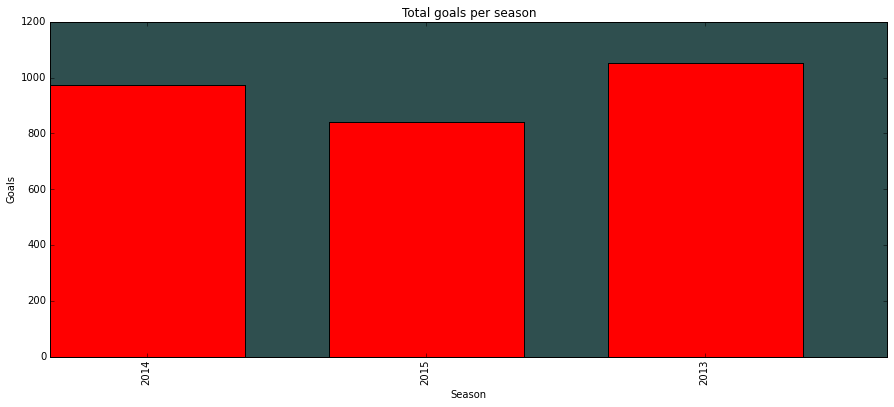

In [8]:
def plot4():
    global fixtures
    c = Counter()
    for g in fixtures:
        c[str(g['season'])] += g['goalsHomeTeam'] + g['goalsAwayTeam']

    x, y = zip(*c.items())
    fig = plt.figure(figsize=(15, 6))
    ax = plt.subplot(111, axisbg=(0.1843, 0.3098, 0.3098))
    width=0.7
    ax.bar(range(len(x)), y, width=width,color='red')
    ax.set_xticks(np.arange(len(x)) + width/2)
    ax.set_xticklabels(x, rotation=90)
    plt.title("Total goals per season")
    plt.xlabel("Season")
    plt.ylabel("Goals")
    plt.show()
plot4()

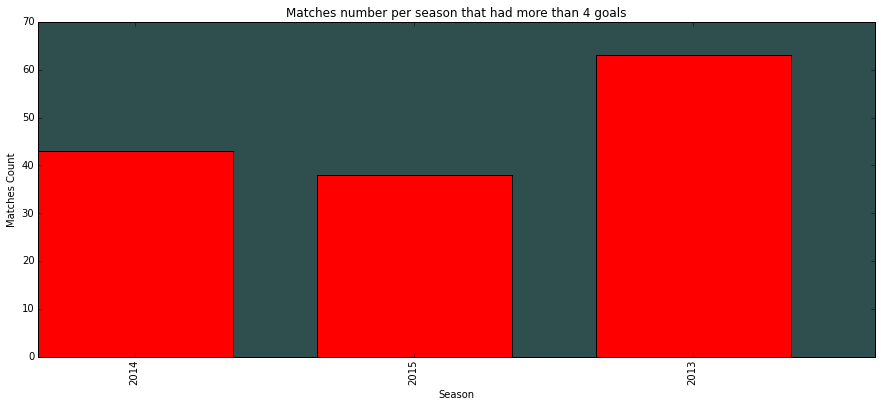

In [9]:
def plot5():
    global fixtures
    c = Counter()
    for g in fixtures:
        if g['goalsHomeTeam'] + g['goalsAwayTeam'] > 4:
            c[str(g['season'])] += 1

    x, y = zip(*c.items())
    fig = plt.figure(figsize=(15, 6))
    ax = plt.subplot(111, axisbg=(0.1843, 0.3098, 0.3098))
    width=0.7
    ax.bar(range(len(x)), y, width=width,color='red')
    ax.set_xticks(np.arange(len(x)) + width/2)
    ax.set_xticklabels(x, rotation=90)
    plt.title("Matches number per season that had more than 4 goals")
    plt.xlabel("Season")
    plt.ylabel("Matches Count")
    plt.show()
plot5()